In [3]:
# RandomForest classifier demo

# use GridSearchCV search best parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

rf = RandomForestClassifier()
parameters = {'n_estimators': range(1,11)}
iris = load_iris()

# use GridSearchCV
clf =  GridSearchCV(estimator=rf , param_grid=parameters)

# classifier the iris data
clf.fit(iris.data, iris.target)

print('best score: %.4lf' % clf.best_score_)
print('best params: ', clf.best_params_)

best score: 0.9667
best params:  {'n_estimators': 9}


In [15]:
# use Pipeline to workflow job
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np

rf = RandomForestClassifier()
parameters = {'randomforestclassifier__n_estimators': range(1, 11)}
iris = load_iris()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforestclassifier', rf),
])

# use GridSearchCV 
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)

# classifier iris data
clf.fit(iris.data, iris.target)
print('best score: %.4lf' % clf.best_score_)
print('best param: ', clf.best_params_)

best score: 0.9600
best param:  {'randomforestclassifier__n_estimators': 3}


0    23364
1     6636
Name: default.payment.next.month, dtype: int64


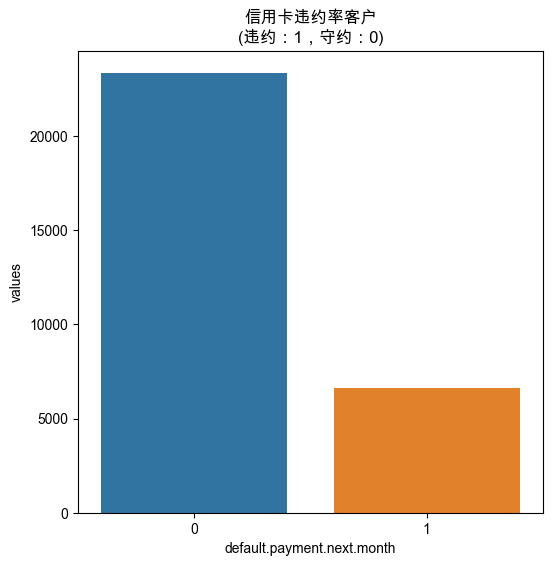

GridSearch best param: {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch best score: 0.8186
accuracy score: 0.8172
GridSearch best param: {'decisiontreeclassifier__max_depth': 6}
GridSearch best score: 0.8208
accuracy score: 0.8113
GridSearch best param: {'randomforestclassifier__n_estimators': 6}
GridSearch best score: 0.8004
accuracy score: 0.7994
GridSearch best param: {'kneighborsclassifier__n_neighbors': 8}
GridSearch best score: 0.8040
accuracy score: 0.8036


In [42]:
# anaysis the credit card data
"""
ID: 客户ID
LIMIT_BAL: 可透支金额
SEX: 性别， 男：1， 女：2
EDUCATION： 教育程度， 研究生：1， 本科：2， 高中：3， 其他：4
MARRIAGE： 婚姻， 已婚：1， 单身：2， 其他：3
AGE： 年龄
PAY_0： 2005年9月客户还款情况
PAY_2： 2005年8月客户还款情况
PAY_3： 2005年7月客户还款情况
PAY_4： 2005年6月客户还款情况
PAY_5： 2005年5月客户还款情况
PAY_6： 2005年4月客户还款情况
BILL_AMT1：2005年9月客户账单金额
BILL_AMT2：2005年8月客户账单金额
BILL_AMT3：2005年7月客户账单金额
BILL_AMT4：2005年6月客户账单金额
BILL_AMT5：2005年5月客户账单金额
BILL_AMT6：2005年4月客户账单金额
PAY_AMT1：2005年9月客户每月还款金额
PAY_AMT2：2005年8月客户每月还款金额
PAY_AMT3：2005年7月客户每月还款金额
PAY_AMT4：2005年6月客户每月还款金额
PAY_AMT5：2005年5月客户每月还款金额
PAY_AMT6：2005年4月客户每月还款金额
default.payment.next.month'：下个月是否违约，违约：1， 守约：0
"""

import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# load data
data = pd.read_csv('./data/UCI_Credit_Card.csv')

# Explore the data
data.shape
data.describe()

# next month default
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

df = pd.DataFrame({'default.payment.next.month': next_month.index, 'values':next_month.values})

# show chinese
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n(违约：1，守约：0)')
sns.set_color_codes('pastel')
sns.barplot(x = 'default.payment.next.month', y = 'values', data = df)
locs, labels = plt.xticks()
plt.show()

# Feature selection, just remove the ID field and the last result field
data.drop(['ID'], inplace = True, axis = 1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

# 30% test, other train
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size= 0.3, stratify=target, random_state=1)


# set more classifier
classifiers = [
    SVC(random_state= 1, kernel= 'rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]

# classifier name
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]

# set classifier params
classifier_param_grid = [
    {'svc__C':[1], 'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators': [3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

# Optimize GridSearchCV parameters for specific classifiers
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)

    # search the best params and best score
    search = gridsearch.fit(train_x, train_y)
    print('GridSearch best param:', search.best_params_)
    print('GridSearch best score: %.4lf' % search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('accuracy score: %.4lf' % accuracy_score(test_y, predict_y))
    response['predict_y']  = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score = 'accuracy')
